<a href="https://colab.research.google.com/github/hemang03/seaborn-data/blob/master/bikeshare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as am

In [52]:
data = pd.read_csv('/content/bikeshare.csv', index_col='dteday' , parse_dates=True)
data.head()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,,,
2011-01-01,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
2011-01-01,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2011-01-01,3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
2011-01-01,4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
2011-01-01,5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [53]:
data.rename(columns={'cnt' : 'total'} , inplace = True)
data.head(1)

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,total
dteday,,,,,,,,,,,,,,,,
2011-01-01,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16


In [54]:
data.isnull().any()

instant       False
season        False
yr            False
mnth          False
hr            False
holiday       False
weekday       False
workingday    False
weathersit    False
temp          False
atemp         False
hum           False
windspeed     False
casual        False
registered    False
total         False
dtype: bool

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17379 entries, 2011-01-01 to 2012-12-31
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   season      17379 non-null  int64  
 2   yr          17379 non-null  int64  
 3   mnth        17379 non-null  int64  
 4   hr          17379 non-null  int64  
 5   holiday     17379 non-null  int64  
 6   weekday     17379 non-null  int64  
 7   workingday  17379 non-null  int64  
 8   weathersit  17379 non-null  int64  
 9   temp        17379 non-null  float64
 10  atemp       17379 non-null  float64
 11  hum         17379 non-null  float64
 12  windspeed   17379 non-null  float64
 13  casual      17379 non-null  int64  
 14  registered  17379 non-null  int64  
 15  total       17379 non-null  int64  
dtypes: float64(4), int64(12)
memory usage: 2.3 MB


In [56]:
data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,total
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [57]:
data.dtypes

instant         int64
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
total           int64
dtype: object

In [58]:
plt.rcParams['figure.figsize'] =(8,6)
plt.rcParams['font.size'] = 12

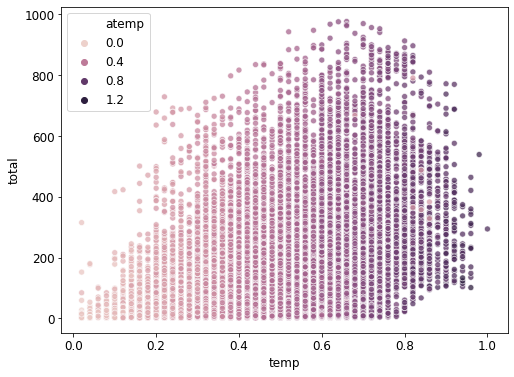

In [59]:
sns.scatterplot(data = data , x = 'temp' , y = 'total' , hue = 'atemp' , alpha=0.75)

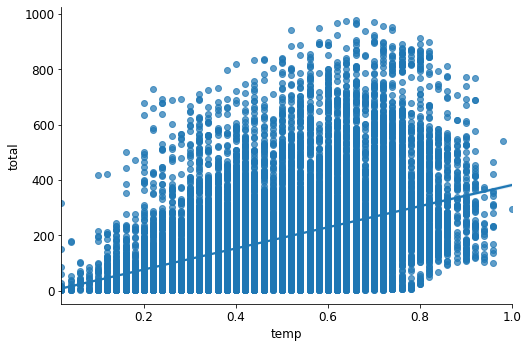

In [60]:
sns.lmplot(data = data , x = 'temp' , y = 'total' , aspect=1.5 ,scatter_kws={'alpha': 0.71} )

In [61]:
feature_col=['temp']
X = data[feature_col]
y = data.total

In [62]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [63]:
print(regressor.intercept_)
print(regressor.coef_)

-0.03559611264242335
[381.29492226]


In [64]:
regressor.intercept_ * regressor.coef_*33

array([-447.89636109])

In [65]:
data['temp_f'] = data.temp*1.8+32

In [66]:
data.head(2)

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,total,temp_f
dteday,,,,,,,,,,,,,,,,,
2011-01-01,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,32.432
2011-01-01,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,32.396


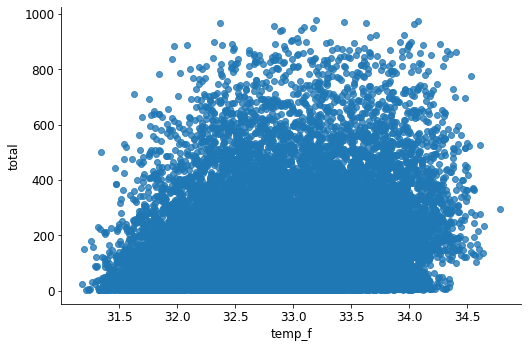

In [67]:
sns.lmplot(x = 'temp_f' , y = 'total' , data = data , x_jitter=1 ,  aspect =1.5 , scatter_kws={'alpha':0.77})

In [68]:
feature = ['temp_f']
X = data[feature]
y = data.total

In [69]:
from sklearn.linear_model import LinearRegression
regressor1 = LinearRegression()
regressor1.fit(X , y )

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [70]:
print(regressor1.coef_)
print(regressor1.intercept_)

[211.83051237]
-6778.611991831312


In [71]:
23*1.8+32

73.4

In [72]:
regressor1.coef_*regressor1.intercept_*73.4

array([-1.05396297e+08])

In [73]:
data.drop('temp_f',axis = 1 , inplace = True)

In [74]:
list(data.columns)

['instant',
 'season',
 'yr',
 'mnth',
 'hr',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'casual',
 'registered',
 'total']

In [75]:
data.rename(columns ={'weathersit':'weather' , 'hum' :'humidity' }, inplace= True)

In [76]:
data.columns

Index(['instant', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed',
       'casual', 'registered', 'total'],
      dtype='object')

In [77]:
feature_col_1 = ['temp' , 'season' , 'weather' , 'humidity']
X = data[feature_col_1]
y = data.total

In [78]:
from  sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X ,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [79]:
print(linreg.coef_)
print(linreg.intercept_)

[ 327.52249338   19.63782596    9.4232999  -310.77726107]
159.05942984501814


In [80]:
#manual way of predict
linreg.coef_*linreg.intercept_

array([ 52095.54105805,   3123.58140117,   1498.86470892, -49432.05395436])

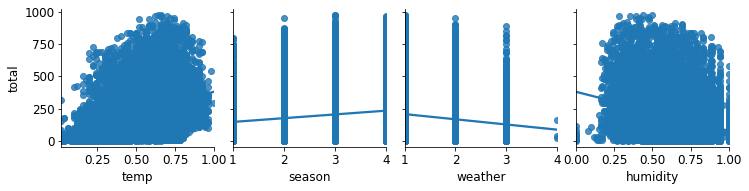

In [81]:
sns.pairplot(data = data , x_vars = feature_col_1 , y_vars = 'total' , kind='reg')

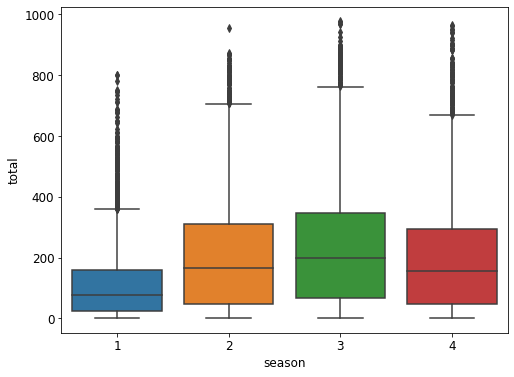

In [82]:
sns.boxplot(x = 'season' , y = 'total' , data = data)

In [83]:
list(zip(linreg.coef_ , feature_col_1))

[(327.5224933775115, 'temp'),
 (19.637825963625165, 'season'),
 (9.423299897252582, 'weather'),
 (-310.77726106857546, 'humidity')]

In [84]:
true = [10 , 7 , 5 , 5]
pred = [8 , 6 ,5 , 10]

In [85]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(true , pred))
print('MSE:' , metrics.mean_squared_error(true,pred))
print('RMSE:' , np.sqrt(metrics.mean_squared_error(true , pred)))

MAE: 2.0
MSE: 7.5
RMSE: 2.7386127875258306


In [86]:
from sklearn.model_selection import  train_test_split
def train_test_rmse(feature_col_1):
  X = data[feature_col_1]
  y = data.total
  X_train , X_test , y_train , y_test= train_test_split(X , y , random_state =123)
  linreg = LinearRegression()
  linreg.fit(X_train , y_train)
  y_pred = linreg.predict(y_test)
  return np.sqrt(metrics.mean_squared_error(true , pred))


In [87]:
season_dummies = pd.get_dummies(data.season , prefix= 'season' , dummy_na=False )

In [88]:
season_dummies

,season_1,season_2,season_3,season_4
dteday,,,,
2011-01-01,1,0,0,0
2011-01-01,1,0,0,0
2011-01-01,1,0,0,0
2011-01-01,1,0,0,0
2011-01-01,1,0,0,0
...,...,...,...,...
2012-12-31,1,0,0,0
2012-12-31,1,0,0,0
2012-12-31,1,0,0,0


In [89]:
season_dummies.sample(n= 5 , random_state=0)

,season_1,season_2,season_3,season_4
dteday,,,,
2011-05-28,0,1,0,0
2011-10-05,0,0,0,1
2012-10-11,0,0,0,1
2012-02-20,1,0,0,0
2012-06-15,0,1,0,0


In [90]:
season_dummies.drop(season_dummies.columns[0] , inplace=True , axis =1)

In [91]:
season_dummies.sample(n = 5 , random_state=0)

,season_2,season_3,season_4
dteday,,,
2011-05-28,1,0,0
2011-10-05,0,0,1
2012-10-11,0,0,1
2012-02-20,0,0,0
2012-06-15,1,0,0


In [92]:
data['hour'] = data.index.hour

In [93]:
data.index

DatetimeIndex(['2011-01-01', '2011-01-01', '2011-01-01', '2011-01-01',
               '2011-01-01', '2011-01-01', '2011-01-01', '2011-01-01',
               '2011-01-01', '2011-01-01',
               ...
               '2012-12-31', '2012-12-31', '2012-12-31', '2012-12-31',
               '2012-12-31', '2012-12-31', '2012-12-31', '2012-12-31',
               '2012-12-31', '2012-12-31'],
              dtype='datetime64[ns]', name='dteday', length=17379, freq=None)

In [94]:
hour_dummies = pd.get_dummies(data.hour , prefix='hour' )
hour_dummies.sample(n = 5 , random_state= 0)
data = pd.concat([data , hour_dummies], axis=1)

In [95]:
data

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour,hour_0
dteday,,,,,,,,,,,,,,,,,,
2011-01-01,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16,0,1
2011-01-01,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40,0,1
2011-01-01,3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32,0,1
2011-01-01,4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13,0,1
2011-01-01,5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31,17375,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119,0,1
2012-12-31,17376,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89,0,1
2012-12-31,17377,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90,0,1
